# Text Classification with Naive Bayes 

A [tutorial](https://github.com/udacity/machine-learning/tree/master/projects/practice_projects/naive_bayes_tutorial) from Udacity's Machine Learning Nanodegree Program deals with spam detection using Naive Bayes. Here I start with the same dataset, follow the instructions to write my own solutions in the first part. Then, I implement the Naive Bayes Classifier from scratch from a training set, and make predictions on a test set.  



In [2]:
import pandas as pd 
import numpy as np 

## Data Handling 

In [3]:
# spam data from https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection 
df = pd.read_table("smsspamcollection/SMSSpamCollection", header=None)
df.head()

0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [4]:
df.rename(columns={df.columns.values[0]:'label', df.columns.values[1]:'sms_message'}, inplace=True)
df.head()

label                                        sms_message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [5]:
df.label.replace({'ham': 0, 'spam': 1}, inplace=True)
df.head()

label                                        sms_message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

## Bag of Words 

###  Step1: Convert all letters to lowercase

In [6]:
lower_case_documents = df.sms_message.map(lambda s: s.lower())
print (lower_case_documents.head())

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: sms_message, dtype: object


In [7]:
lower_case_documents = lower_case_documents.tolist()

In [8]:
lower_case_documents

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say so early hor... u c already then say...',
 "nah i don't think he goes to usf, he lives around here though",
 "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, £1.50 to rcv",
 'even my brother is not like to speak with me. they treat me like aids patent.',
 "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune",
 'winner!! as a valued network customer you have been selected to receivea £900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.',
 'had you

### Step 2: Remove punctuations

In [9]:
import string 

In [10]:
sans_punctuation_documents = [s.translate(str.maketrans("", "", string.punctuation)) for s in lower_case_documents]
print (sans_punctuation_documents)

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat', 'ok lar joking wif u oni', 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s', 'u dun say so early hor u c already then say', 'nah i dont think he goes to usf he lives around here though', 'freemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send £150 to rcv', 'even my brother is not like to speak with me they treat me like aids patent', 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune', 'winner as a valued network customer you have been selected to receivea £900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only', 'had your mobile 11 months or more u r entitled to update to the lat

### Step 3: Tokenization

Now we can split the sentences into individual words and store them as a list:

In [11]:
preprocessed_documents = [text.split() for text in sans_punctuation_documents]

In [12]:
preprocessed_documents[24]

['ffffffffff',
 'alright',
 'no',
 'way',
 'i',
 'can',
 'meet',
 'up',
 'with',
 'you',
 'sooner']

### Step 4: Our Vocabulary

In [13]:
# Our vocabulary, basically consists of all the words in our dataset: 

vocabulary = []
for word_list in preprocessed_documents:
    vocabulary = list(set(vocabulary + word_list)) 
print (vocabulary)


['commit', 'sleepsweet', 'wit', 'lily', 'broadband', 'flow', 'victors', '0871212025016', 'ad', '7cfca1a', 'popping', '09050001808', 'steal', 'evrey', 'or', '08712460324', 'reply', 'tol', 'nan', '9th', 'aaniye', 'sore', 'truly', 'weekly', 'housewives', 'mre', 'pound', 'contents', 'aha', 'cometil', 'horse', 'shot', 'bian', 'wheat', 'todays', 'n', 'mistakeu', 'outhave', 'supervisor', 'inconsiderate', 'roommates', 'dawns', 'feels', '2morow', 'fringe', 'hows', 'decimal', 'help08700469649', 'dreamz', 'heal', 'birthdate', 'lions', 'namemy', 'je', '4882', 'painful', 'imp', '£150ea', 'greatness', 'mufti', '09066380611', '09065394973', '62220cncl', 'sum', 'zhong', '7684', 'charged', 'earlier', 'escalator', '09066361921', 'date', 'women', 'eggspert', '3750', 'continue', 'tells', 'yessura', 'lifebook', 'flew', 'splendid', 'location', 'll', 'nightnobody', 'bottle', '731', 'tall', 'novelty', 'polo', 'joanna', 'dosomething', 'sacked', 'painit', 'befor', '08719180219', 'signin', 'handsome', 'ava', 'fl

In [14]:
len(vocabulary)

9661

## Creating a Naive Bayes Classifier

$$ P(y | x_1, \cdots, x_n) = \frac{P(y) P(x_1, \cdots, x_n | y)}{P(x_1, \cdots, x_n)} $$

Here, `y` is the class variable, in our case spam or not spam; and `x_1` through `x_n` are the feature vectors or in our case the individual words. 

Given a set of words in a message, we compute the probability that this message is spam as the following:

$$ P(spam \, | \, \text{words})  = \frac{P(spam) P(\text{words} \, | \, spam)}{P(\text{words})} $$   
$$ = \frac{P(spam) P(\text{word}_1  \, | \, spam) \, P(\text{word}_2  \, | \, spam) \cdots P(\text{word}_n  \, | \, spam)}{P(\text{words})} $$ 


Here we make the assumption that the probabilities are conditionally independent, such that we can treat them separately and just multiply them together. 

We will determine the likelihoods that appear on the right hand side, e.g. $P(\text{word}_1  \, | \, spam)$ from the spam messages of our training set. Then we will do the same thing for the non-spam messages, e.g. calculate $P(\text{word}_1  \, | \, ham)$. $P(spam)$ and $P(ham)$ are straightforward to compute. Eventually, we will use these probabilities to determine both $P(spam \, | \, \text{words})$ and $P(ham \, | \, \text{words})$ for a particular message in a test set to determine whether it is spam or not spam. 

For example, for the message "I will call you later", we need to plug in the values for 
* $P(I \,| \, spam)$, $P(will \,| \, spam)$, $P(call \,| \, spam)$, $P(you \,| \, spam)$, $P(later \,| \, spam)$ 
* $P(I \,| \, ham)$, $P(will \,| \, ham)$, $P(call \,| \, ham)$, $P(you \,| \, ham)$, $P(later \,| \, ham)$
that we already determined from the training set, into: 


<p> <p/> 


$$ P(spam \,| \, I \, will \, call \, you \, later) =  \frac{P(spam) \, P(I \,| \, spam) \, P(will \,| \, spam) \, P(call \,| \, spam) \, P(you \,| \, spam) \, P(later \,| \, spam) } {P(I, will, call, you, later)} $$

$$ P(ham \,| \, I \, will \, call \, you \, later) =  \frac{P(ham) \, P(I \,| \, ham) \, P(will \,| \, ham) \, P(call \,| \, spam) \, P(you \,| \, spam) \, P(later \,| \, spam) } {P(I, will, call, you, later)} $$ 


In order to determine whether this message is likely to be spam or not, we need to compare $P(spam \,| \, I \, will \, call \, you \, later)$ and $P(ham \,| \, I \, will \, call \, you \, later)$. Since the denominators are the same for both cases, we can ignore them. Statistically speaking, it is not enough to find one value greater than the other to make a conclusion; but one should ask whether this result happened by chance or not; form a hypothesis and determine a p-value for this. Here, I put a cutoff instead such that I assign a message spam only if the ratio between these is greater than $10^4$. Then, I investigate how this value affects my accuracy score by changing the exponent $10^n$, where $ n $ runs from $0$ to $10$.    

<br> <br/>

Let's split our data into a training and a test set; and calculate the conditional probabilities for both spam and ham case for the training data first. Then we will use these probabilities to calculate the probability that a particular message is spam or not in the test set.   



In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(preprocessed_documents, df.label)

### Calculating probabilities for the spam case 

Now we'd like to separate our training set into spam and not spam cases. First we look at the spam cases:

<p> <p/>

In [16]:
spam_pos = [i for i in range(len(y_train)) if y_train.iloc[i] == 1] 
spam_training_messages = [X_train[i] for i in spam_pos]
print (len(spam_training_messages))
print (len(spam_pos))
print (len(y_train))

558
558
4179


<p> <p/> 

The probability of getting a spam message from this training set is then: 


$$ P(spam) = \frac{\text{number of spam messages in the training set}}{\text{number of messages in the training set}} $$ 

<p> <p/> 

In [17]:
probability_spam = len(spam_training_messages) / len(y_train)
print (probability_spam)

0.13352476669059585


<p> <p/> 

Now, we combine all the words appearing in the training set into a list, and then count how many times each word appears in the training set. This will help us calculate the conditional probabilities later. 



<p> <p/> 

In [18]:
vocabulary_training_spam = []
for word_list in spam_training_messages:
    vocabulary_training_spam = list(set(vocabulary_training_spam + word_list)) 
print (vocabulary_training_spam)

['httpwap', 'must', 'inclusive', 'lily', 'phone', 'polytruepixringtonesgames', '087143423992stop', 'fixed', 'trained', '30', 'fromm', 'strongbuy', '300', 'wwwtxttowincouk', 'bailiff', '7cfca1a', 'datebox1282essexcm61xn', '09050001808', 'or', 'fund', '08712460324', 'westlife', 'freemessage', 'reply', 'cast', '9th', '373', 'website', '23', '2000', 'best', 'tonexs', 'truly', 'weekly', 'housewives', '09061743806', 'videos', 'mre', '20000', 'pound', 'fantastic', 'rayman', 'age16', 'thank', 'shot', 'hear', 'tb', 'todays', 'natalja', 'barbie', 'n', 'doubles', 'fantasy', 'lnly', 'message', '80122300pwk', '750', '2morow', '2stoptxt', 'could', '49557', 'care', 'psychic', 'help08700469649', 'burns', 'cc', 'mobiles', '5wb', 'fast', 'dload', '08718720201', '150pmtmsgrcvd18', 'lions', '087016248', '4882', '3mobile', 'lkpobox177hp51fl', 'competition', 'pole', 'weekends', 'lines', 'december', 'box42wr29c', 'exciting', '09066380611', '09065394973', 'flirt', '07732584351', '7684', 'tcrw1', 'support', 'c

In [19]:
# here we count how many times each word appears in the training set:
from collections import Counter
frequency_list_training_spam = Counter(vocabulary_training_spam)
print (len(frequency_list_training_spam))

2575


In [20]:
print (frequency_list_training_spam.values())
print (frequency_list_training_spam[vocabulary[165]])

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<br> <br/> 


Now let's calculate the probabilities of each word in the document vocabulary appearing in the spam piece of the training set, specifically, we calculate P(word_1 | spam).

Because some probabilities will turn out zero, we add two fictitous terms to numerator and denominator to "regularize"
the probabilities. Here is a way to regularize: 
P(word_1 | spam) = (n_word_1 + 1) / (number of spam documents + number of items in the vocabulary)


I change this regularization to: P(word_1 | spam) = (n_word_1 + 10^(-22)) / (number of spam documents)

The reason for this is that the length of our vocabulary is in the order of thousands, while the frequency 
of a word appearing among the spam documents is very low -- just 1 -- this makes for example, P(word_1 | spam) 
extremely small, close to zero, makes it hard to distinguish from a probability for the non-spam case. 
We would like to separate the values of probability of a word appearing or not appearing among spam documents
as far as possible.  



<p> <p/> 

In [21]:

probabilities_training_spam = [(frequency_list_training_spam[vocabulary[i]]) / (len(vocabulary_training_spam)) for i in range(len(vocabulary))] 

probabilities_training_spam_regularized = [(frequency_list_training_spam[vocabulary[i]] + 0.0000000000000000000001) / (len(vocabulary_training_spam)) for i in range(len(vocabulary))] 




In [22]:
set(probabilities_training_spam_regularized)

{3.883495145631068e-26, 0.0003883495145631068}

In [23]:
set(probabilities_training_spam)

{0.0, 0.0003883495145631068}

### Calculating probabilities for the non spam case 

In [24]:
ham_pos = [i for i in range(len(y_train)) if y_train.iloc[i] == 0] 
ham_training_messages = [X_train[i] for i in ham_pos]
print (len(ham_training_messages))
print (len(ham_pos))
print (len(y_train))

3621
3621
4179


In [25]:
# the probability of getting a non spam message from this training set is then: 
# P(ham) = ...
probability_ham = len(ham_training_messages) / len(y_train)
print (probability_ham)

0.8664752333094041


In [26]:
# let's combine all the words appearing in the training set into a list:
vocabulary_training_ham = []
for word_list in ham_training_messages:
    vocabulary_training_ham = list(set(vocabulary_training_ham + word_list)) 
print (vocabulary_training_ham)

['commit', 'sleepsweet', 'wit', 'flow', 'victors', 'ad', 'popping', 'steal', 'evrey', 'or', 'reply', 'nan', 'aaniye', 'sore', 'truly', 'pound', 'contents', 'aha', 'cometil', 'horse', 'shot', 'wheat', 'todays', 'n', 'mistakeu', 'outhave', 'supervisor', 'inconsiderate', 'roommates', 'feels', '2morow', 'fringe', 'hows', 'decimal', 'heal', 'birthdate', 'namemy', 'je', 'painful', 'imp', 'mufti', 'greatness', 'sum', 'zhong', 'escalator', 'earlier', 'date', 'women', 'eggspert', 'continue', 'tells', 'lifebook', 'flew', 'splendid', 'll', 'location', 'bottle', 'nightnobody', 'tall', 'joanna', 'dosomething', 'painit', 'befor', 'handsome', 'flavour', 'sunday', 'shola', 'labor', 'aburo', 'kerala', 'hit', 'recognises', 'asda', 'swollen', 'semi', 'rsi', 'massages', 'hellohow', 'toot', 'pouch', 'yuou', 'yagoing', 'regular', 'cake', 'gran', 'callertune', '2morrowxxxx', 'paper', '6', 'tmw', 'dramatic', 'thangam', 'gandhipuram', 'help', 'favour', 'personally', 'multis', 'rise', 'dom', 'talks', 'faber', '

In [27]:
# here we count how many times each word appears in the training set:
from collections import Counter
frequency_list_training_ham = Counter(vocabulary_training_ham)
print (len(frequency_list_training_ham))

6517


In [28]:
# now let's calculate the probabilities of each word in the document vocabulary appearing in the not-spam piece of the training set: 
# specifically, we calculate P(word_1 | ham) = ... 
# because some probabilities will turn out zero, we add two fictitous terms to numerator and denominator to "regularize"
# the probabilities
# P(word_1 | ham) = (n_word_1 + 1) / (number of ham documents + number of items in the vocabulary)
# Here I change this regularization to: P(word_1 | ham) = (n_word_1 + 10^(-22)) / (number of ham documents)


probabilities_training_ham = [(frequency_list_training_ham[vocabulary[i]]) / (len(vocabulary_training_ham)) for i in range(len(vocabulary))] 
probabilities_training_ham_regularized = [(frequency_list_training_ham[vocabulary[i]] + 0.0000000000000000000001) / (len(vocabulary_training_ham)) for i in range(len(vocabulary))] 




In [29]:
print (set(probabilities_training_ham_regularized))
print (set(probabilities_training_spam_regularized))
print (set(probabilities_training_ham))
print (set(probabilities_training_spam))

{0.00015344483658124905, 1.5344483658124906e-26}
{3.883495145631068e-26, 0.0003883495145631068}
{0.0, 0.00015344483658124905}
{0.0, 0.0003883495145631068}


In [30]:
print (probabilities_training_spam_regularized[2])
print (probabilities_training_ham_regularized[2])
print (probabilities_training_spam_regularized[2] / probabilities_training_ham_regularized[2])

3.883495145631068e-26
0.00015344483658124905
2.530873786407767e-22


In [31]:
print (len(vocabulary_training_ham))
print (len(set(vocabulary_training_ham)))

6517
6517


In [216]:
# with all the conditional probabilities in hand, we can move on to our test set and start predicting whether a message
# is spam or not. 

### Predicting whether a message is spam or not using our test set 

In [32]:
def predict_spam(messages, n, verbose):
    
    y_labels = []
       
    for message in messages:  
        prob_s = 1 
        prob_h = 1 

        for word in message:
            index = vocabulary.index(word) if word in vocabulary else None
            p_word_spam = probabilities_training_spam_regularized[index]
            p_word_ham = probabilities_training_ham_regularized[index]
            
            if verbose == True:
                print ("p('%s' | spam): %s" % (word, p_word_spam))
                print ("p('%s' | ham): %s" % (word, p_word_ham)) 
            prob_s *= p_word_spam
            prob_h *= p_word_ham

            
        prob_message_spam = prob_s * probability_spam
        prob_message_ham = prob_h * probability_ham

        
        if verbose == True:
            print ("relative probability that this message is spam: %s" % (prob_message_spam))
            print ("relative probability that this message is not spam: %s" % (prob_message_ham))

        

        if prob_message_spam > (10 ** n) * prob_message_ham:
            y_labels.append(1)
            print ("Message is spam!")
            print ("")
        else: 
            y_labels.append(0)
            print ("Message is not spam!")
            print ("")
    
    return y_labels 

    

In [33]:
y_labels = predict_spam(X_test, 4, True)

p('well' | spam): 0.0003883495145631068
p('well' | ham): 0.00015344483658124905
p('shes' | spam): 3.883495145631068e-26
p('shes' | ham): 0.00015344483658124905
p('in' | spam): 0.0003883495145631068
p('in' | ham): 0.00015344483658124905
p('for' | spam): 0.0003883495145631068
p('for' | ham): 0.00015344483658124905
p('a' | spam): 0.0003883495145631068
p('a' | ham): 0.00015344483658124905
p('big' | spam): 0.0003883495145631068
p('big' | ham): 0.00015344483658124905
p('surprise' | spam): 0.0003883495145631068
p('surprise' | ham): 0.00015344483658124905
relative probability that this message is spam: 1.778775725674092e-47
relative probability that this message is not spam: 1.735489964518649e-27
Message is not spam!

p('you' | spam): 0.0003883495145631068
p('you' | ham): 0.00015344483658124905
p('unbelievable' | spam): 3.883495145631068e-26
p('unbelievable' | ham): 0.00015344483658124905
p('faglord' | spam): 3.883495145631068e-26
p('faglord' | ham): 1.5344483658124906e-26
relative probability


<br> <br/> 



### Accuracy Score 

In [35]:
check_y = [y_labels[i] == y_test.tolist()[i] for i in range(len(y_labels))] 
print (check_y.count(True)) 
print (len(y_labels))
print (check_y.count(True) / len(y_labels))

1353
1393
0.9712849964106246


In [44]:
accuracies = []
n = range(20)

for i in range(20):
    y_i = predict_spam(X_test, i, False);
    check_y_i = [y_i[i] == y_test.tolist()[i] for i in range(len(y_i))]
    accuracy_i = check_y_i.count(True) / len(y_labels)
    accuracies.append(accuracy_i)
       

Message is not spam!

Message is not spam!

Message is spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is spam!

Message is not spam!

Message is spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is spam!

Message is spam!

Message is not spam!

Message is not spam!

Message is spam!

Message is not spam!

Message is not spam!

Message is spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is not spam!

Message is spam!

Message is not spam!

Message is not spam!

Messag

In [45]:
accuracies

[0.9009332376166547,
 0.9131371141421393,
 0.9411342426417804,
 0.9626704953338119,
 0.9712849964106246,
 0.9741564967695621,
 0.9763101220387652,
 0.9777458722182341,
 0.9777458722182341,
 0.9770279971284996,
 0.9741564967695621,
 0.9720028715003589,
 0.9720028715003589,
 0.9720028715003589,
 0.9720028715003589,
 0.9720028715003589,
 0.9720028715003589,
 0.9720028715003589,
 0.9720028715003589,
 0.9720028715003589]

In [46]:
import matplotlib.pyplot as plt 
%matplotlib inline 

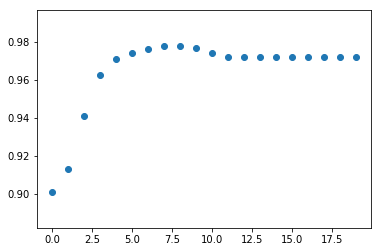

In [50]:
n = range(20)
plt.scatter(n, accuracies)